# Assignment 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import pandas as pd    
 
# from drawnow import drawnow

# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

n = 100
meanA = [1.7, 1.7]
meanB = [-1.7, -1.7]
sigmaA = 0.5
sigmaB = 0.5

class MultiVar_Normal_Distri:
    def __init__(self, mean, cov, n):
        self.mean = mean
        self.cov = cov
        self.n = n
        self.labels = []
        self.give_distributions()
        self.vector = self.get_vector()
        self.set_labels()
        self.set_data()

    
    def give_distributions(self):
        self.x = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[1])[0] 

    def get_vector(self):
        if self.x[0] < 0 or self.y[0] < 0 :
            return -1*(np.multiply(self.x, self.y))
        else:
            return np.multiply(self.x, self.y)
    
    def set_labels(self):
        for i in self.vector:
            if i > 0:
                self.labels.append(1.0)
            else:
                self.labels.append(0)

    def set_data(self):
        bias = -1*np.ones(len(self.x))
        self.training_data = np.array([list(self.x), list(self.y), bias, list(self.labels)])
        self.training_data = np.transpose(self.training_data)
        # np.random.shuffle(self.training_data)
        self.X = self.training_data[:, 0:3]
        self.Y = self.training_data[:, 3]

def randomise_data(dataA, dataB):
    all_data = np.concatenate((dataA,dataB), axis=0)
    np.random.shuffle(all_data)

    inputs = all_data[:, 0:3]
    labels = all_data[:, 3:4]
    return all_data, inputs, labels

def plot_data(dataA, dataB): 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.title('Data Set A1 vs B1') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

def plot_decision_boundry(dataA, dataB, weight_set):
    x_weight = weight_set[0]
    y_weight = weight_set[1]

    constant = x_weight**2 + y_weight**2
    d_y = []
    d_x = []
    for i in range(-10, 10, 1):
        inc = i/100
        d_y.append((constant-x_weight*i)/y_weight)
        d_x.append(inc)
 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and the decision boundry') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    orange = mpatches.Patch(color='orange', label='Boundry')
    plt.legend(handles=[blue, red, orange])
    plt.ylim([-4, 4])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   



Instructions for updating:
non-resource variables are not supported in the long term


## Generation of linearly seperable data

In [3]:
dataA = MultiVar_Normal_Distri(meanA, sigmaA, n)
dataB = MultiVar_Normal_Distri(meanB, sigmaB, n)
randomised_data, inputs, labels = randomise_data(dataA.training_data, dataB.training_data)

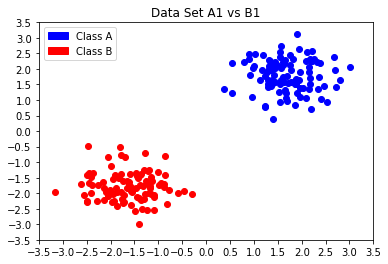

In [4]:
plot_data(dataA, dataB)

## Classification with a single-layer perceptron and analysis
- Use hard activation function @ 0  -> __(Used sigmoid below)__
- Class A results in neuron firing
- Class B results in neuron not firing
- The decision boundry needs to be created from the data
    - It is the normal of the weights 'vector' -> __final weight vector used for the model and to plot the decision boundry__ 
- First, will look at the __vector__ of each point. If it is in Q1, it should be on and if it is Q3 it should be off. 

__ DID NOT USE BELOW__
- The inputs are dataX.vector and the outputs are dataX.labels
    - Also, the inputs are dataX.X abd the labels are dataX.Y
    - where, dataX.X shows the x and y input coords- (2,100) - and dataX.Y the labels as (100,1) matrix (column) 

__DID USE__
- x and y coord of each are inputs to a neuron

### The Process
- Each class has two vectors which correspond to the x and y coords when plotted. 
- These are the two inputs to the perceptron. 
- If it is > 0, then the neuron should fire. If it is less than 0, the neuron should not fire. 
- Inputs -> W -> Sum -> Activation Fxn -> Output - TargetOutput
    - The output will either be a 1 or a zero. If it is +-1, weights must be changed.
    - $w - error*\eta*(the input)$

### The next block is just test code

In [30]:
import numpy as np
tx = np.array([  [2, 3, 4]])
tweights = np.array([ [2, 3, 5],
                        [3, 4, 3],
                        [4, 5, 1] ])
tweights2 = np.array([ [2],
                        [3],
                        [4],
                        [5] ])
tbias = np.array([ [1,1,1] ])
# o = tf.add( tf.matmul(tx, tweights), tbias )
# with tf.Session() as sess:
#     # init vars for session
#     print(o.eval())
#     print("Training Complete.")
#     sess.close()
tx2 = np.array([  [1,2],
                [3,4],
                [5,6],])

In [35]:
np.sum(tweights, 0)

        # self.inputs = inputs
        # self.training_input = inputs[0:2, 0:35].T
        # self.testing_input = inputs[0:2, 35:70].T

array([ 9, 12,  9])

__Training starts here__

In [7]:

def get_batch(X, Y, batch_size, index):
    return X[batch_size*index:batch_size*(index+1)], Y[batch_size*index:batch_size*(index+1)]

# The perceptron 
num_units = 1
num_inputs = 2 + 1 # +1 for bias
num_ouputs = 1

# Parameters
learning_rate = 0.2
epochs = 20
batch_size = 20
total_num_batches = int(inputs.shape[0]/batch_size) # 10 batches 

# these are placeholder variables that are assigned values later
# x now has many rows but 2 columns (y is also defined)
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_ouputs])

weights = tf.Variable(tf.random_normal([num_inputs, num_units])) # +1 for bias
bias = tf.Variable(tf.random_normal([num_units]))


In [13]:
bias

<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>

In [9]:
# activation_fxn(x*weights + b), a_fxn is a sigmoid?
output_b4_act = tf.matmul(x, weights) #tf.add(tf.matmul(x, weights), bias) 
output = tf.sigmoid(output_b4_act)

In [10]:
# cost or error function
cost_output = tf.reduce_mean(output - y)
# cost_output = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=output)).

# optimizer- grad descent
grad_descent_output = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_output)

0.10395751
0.10192895
0.100149915
0.098491356
0.096851915
0.095136955
0.09324117
0.09102698
0.0882902
0.0846931
0.079616144
0.07178239
0.058147985
0.030005122
-0.040740617
-0.18104127
-0.27100918
-0.31166533
-0.3368258
-0.35457456
Training Complete.


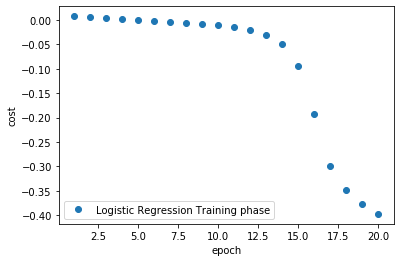

In [11]:
init = tf.global_variables_initializer()
avg_set = []
epoch_set = []
weight_set = []

with tf.Session() as sess:
    # init vars for session
    sess.run(init)

    # iterate through epochs (num of times through data) and batch to
    for e in range(epochs):
        avg_cost = 0

        for i in range(total_num_batches):
            x_batch, y_batch = get_batch(inputs, labels, batch_size, i)

            # Fit training data
            _,c = sess.run([grad_descent_output, cost_output], feed_dict={x: x_batch, y: y_batch})
            # Compute average loss
            avg_cost += c/total_num_batches
        print(c)
        epoch_set.append(e+1)
        avg_set.append(avg_cost)
        weight_set.append(weights.eval())
        # print("Epoch: ", e+1, " Loss: ", avg_cost)
    
    print("Training Complete.")
    # test model using the first couple of values (usually should not do this)
    # predictions = output.eval({x:inputs[:10]})
    # print(inputs[:10])
    # print(predictions)
    sess.close()

plt.plot(epoch_set,avg_set, 'o', label = 'Logistic Regression Training phase') 
plt.ylabel('cost') 
plt.xlabel('epoch') 
plt.legend() 
plt.show() 



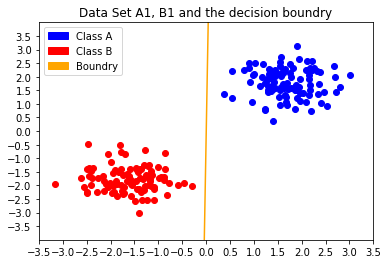

In [12]:
 
plot_decision_boundry(dataA, dataB, weight_set[19])

# Without TF